# 1.5.9 Feature Matching

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img1 = cv2.imread('SampleFiles/template.jpg', 0) # queryImage
img2 = cv2.imread('SampleFiles/book1.jpg', 0) # trainImage

In [3]:
# Initiate SIFT detector
#sift = cv2.SIFT()
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

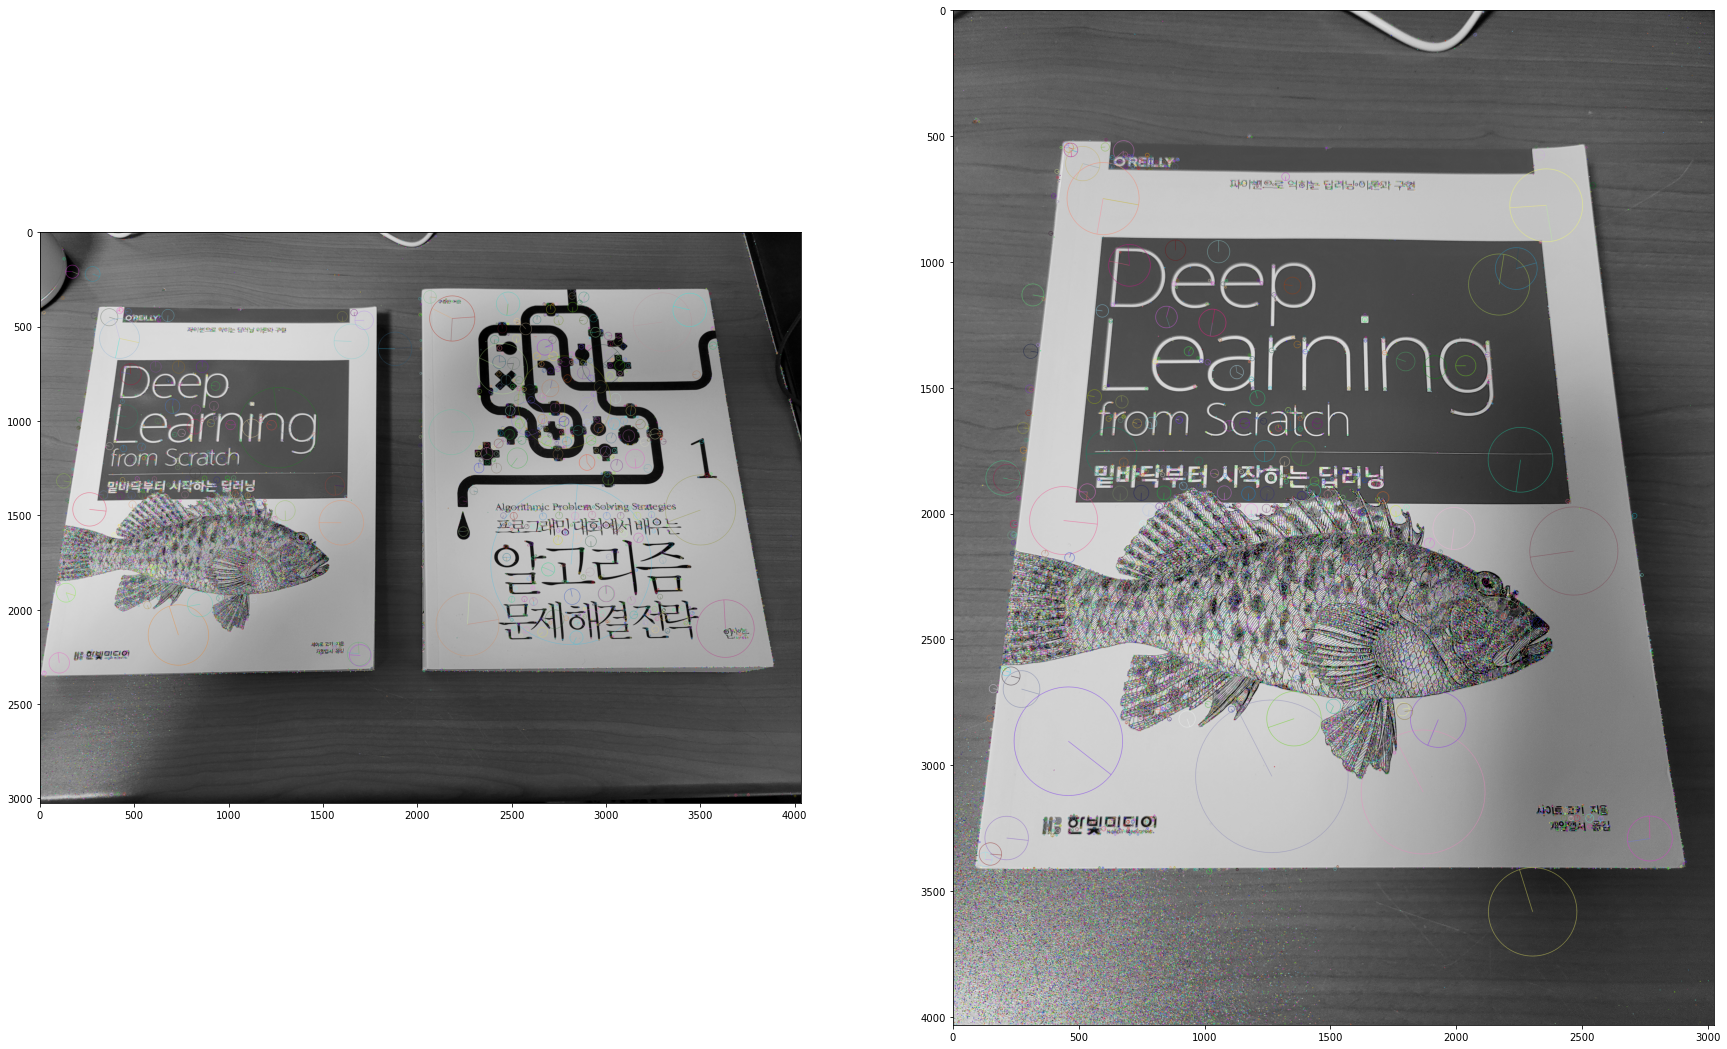

In [4]:
img1v = cv2.drawKeypoints(img1, kp1, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
img2v = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (30,26))
plt.subplot(1,2,1), plt.imshow(img1v)
plt.subplot(1,2,2), plt.imshow(img2v)
plt.show()

In [5]:
print(kp1[0])

<KeyPoint 000002B6BFC15BD0>


In [4]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []

In [5]:
for m,n in matches:
    #print(m.distance, n.distance)
    if m.distance < 0.65*n.distance:
        good.append([m])

In [8]:
print(len(good))

2258


In [6]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

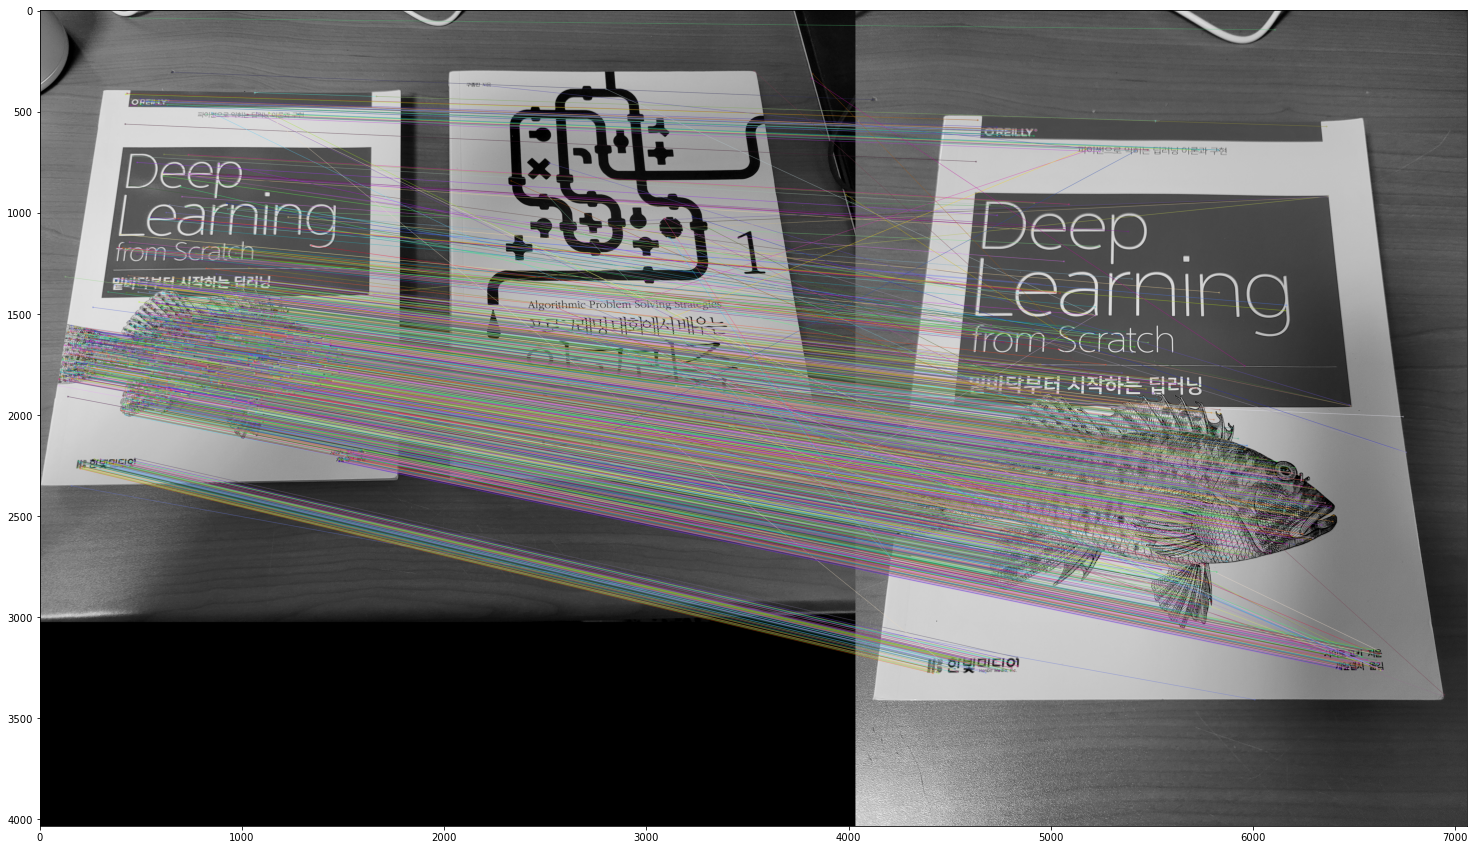

(<matplotlib.image.AxesImage at 0x18a33186070>, None)

In [7]:
plt.figure(figsize=(30,15))
plt.imshow(img3),plt.show()